In [2]:
import pandas as pd
import numpy as np

# Extração de Dados

In [3]:
print('lendo as tabelas...')
for ano in range(21, 8, -1):
    for tabela in ['CURSOS', 'IES']:
        if ano == 9:
            ano = '09'
        
        exec(f"df = pd.read_csv('data/20{ano}/MICRODADOS_CADASTRO_{tabela}_20{ano}.csv', sep=';', encoding='latin1', low_memory=False)")

        _tabela = tabela.lower()
        if ano == 21:
            exec(f'{_tabela} = df')
        else:
            exec(f'{_tabela} = pd.concat([{_tabela}, df], ignore_index=True)')

    print(f'data 20{ano} : OK.')
print('tabelas lidas com sucesso!')
del(df)

lendo as tabelas...
data 2021 : OK.
data 2020 : OK.
data 2019 : OK.
data 2018 : OK.
data 2017 : OK.
data 2016 : OK.
data 2015 : OK.
data 2014 : OK.
data 2013 : OK.
data 2012 : OK.
data 2011 : OK.
data 2010 : OK.
data 2009 : OK.
tabelas lidas com sucesso!


In [4]:
cursos.head()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_DIMENSAO,...,QT_CONC_APOIO_SOCIAL,QT_ATIV_EXTRACURRICULAR,QT_ING_ATIV_EXTRACURRICULAR,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA,CO_CINE_ROTULO2
0,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [5]:
ies.head()

,NU_ANO_CENSO,NO_REGIAO_IES,CO_REGIAO_IES,NO_UF_IES,SG_UF_IES,CO_UF_IES,NO_MUNICIPIO_IES,CO_MUNICIPIO_IES,IN_CAPITAL_IES,NO_MESORREGIAO_IES,...,DOC_EX_60_MAIS,DOC_EX_BRANCA,DOC_EX_PRETA,DOC_EX_PARDA,DOC_EX_AMARELA,DOC_EX_INDIGENA,DOC_EX_COR_ND,DOC_EX_BRA,DOC_EX_EST,DOC_EX_COM_DEFICIENCIA
0,2021,Centro-Oeste,5,Mato Grosso,MT,51,Cuiabá,5103403,1,Centro-Sul Mato-grossense,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,1,Distrito Federal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,Nordeste,2,Sergipe,SE,28,São Cristóvão,2806701,0,Leste Sergipano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,Norte,1,Amazonas,AM,13,Manaus,1302603,1,Centro Amazonense,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,Nordeste,2,Piauí,PI,22,Teresina,2211001,1,Centro-Norte Piauiense,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Transformação de Dados

In [6]:
cursos = cursos[['NU_ANO_CENSO', 'CO_CURSO', 'NO_CURSO', 'CO_IES', 'NO_CINE_AREA_GERAL', 'TP_GRAU_ACADEMICO', 'TP_MODALIDADE_ENSINO', 'QT_VG_TOTAL', 'QT_INSCRITO_TOTAL', 'QT_ING', 'QT_MAT', 'QT_CONC']]

In [7]:
#mudar nomes das tabelas de curso
cursos = cursos.rename(columns={'NU_ANO_CENSO': 'Ano', 
                                'CO_CURSO': 'Cod', 
                                'NO_CURSO': 'Nome', 
                                'CO_IES': 'IES', 
                                'NO_CINE_AREA_GERAL': 'Area', 
                                'TP_GRAU_ACADEMICO': 'Grau', 
                                'TP_MODALIDADE_ENSINO': 'Modalidade',
                                'QT_VG_TOTAL': 'Vagas Abertas', 
                                'QT_INSCRITO_TOTAL': 'Inscritos', 
                                'QT_ING': 'Ingressantes', 
                                'QT_MAT': 'Matriculados', 
                                'QT_CONC': 'Concluintes'})

In [8]:
#substituir valores de grau
cursos['Grau'] = cursos['Grau'].replace({1: 'Bacharelado', 
                                         2: 'Licenciatura', 
                                         3: 'Tecnológico',
                                         4: 'Bacharelado e Licenciatura', 
                                         np.nan: 'Não aplicável'})

In [9]:
#substituir valores de modalidade
cursos['Modalidade'] = cursos['Modalidade'].replace({1: 'Presencial', 2: 'EaD'})

In [10]:
cursos = cursos.groupby(['Ano', 'Cod', 'Nome', 'IES', 'Area', 'Grau', 'Modalidade']).sum().reset_index()

In [34]:
cursos[['Vagas Abertas', 'Inscritos', 'Ingressantes', 'Matriculados', 'Concluintes']] = cursos[['Vagas Abertas', 'Inscritos', 'Ingressantes', 'Matriculados', 'Concluintes']].astype(int)

In [35]:
cursos.head()

,Ano,Cod,Nome,IES,Area,Grau,Modalidade,Vagas Abertas,Inscritos,Ingressantes,Matriculados,Concluintes
0,2009,1,DIREITO,1,"Negócios, administração e direito",Bacharelado,Presencial,90,1880,101,417,84
1,2009,2,CIENCIAS ECONOMICAS,1,"Ciências sociais, comunicação e informação",Bacharelado,Presencial,100,497,107,413,44
2,2009,3,ENGENHARIA CIVIL,1,"Engenharia, produção e construção",Bacharelado,Presencial,52,913,51,285,31
3,2009,6,PEDAGOGIA,1,Educação,Licenciatura,Presencial,90,425,0,1,0
4,2009,7,SERVICO SOCIAL,1,Saúde e bem-estar,Bacharelado,Presencial,80,865,80,309,48


In [ ]:
c

In [12]:
ies = ies[['CO_IES', 'NO_IES', 'SG_IES', 'SG_UF_IES', 'NO_MUNICIPIO_IES', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_ORGANIZACAO_ACADEMICA']]
ies = ies.drop_duplicates(subset=['CO_IES']).reset_index(drop=True)

In [13]:
ies = ies.rename(columns={'CO_IES': 'Cod', 
                          'NO_IES': 'Nome', 
                          'SG_IES': 'Sigla', 
                          'SG_UF_IES': 'UF', 
                          'NO_MUNICIPIO_IES': 'Municipio', 
                          'TP_CATEGORIA_ADMINISTRATIVA': 'Categoria', 
                          'TP_ORGANIZACAO_ACADEMICA': 'Organizacao'})

In [14]:
# substituindo valores
ies['Categoria'] = ies['Categoria'].replace({1: 'Publica Federal',
                                            2: 'Publica Estadual',
                                            3: 'Publica Municipal',
                                            4: 'Privada com fins lucrativos',
                                            5: 'Privada sem fins lucrativos',
                                            6: 'Privada - Particular em sentido estrito',
                                            7: 'Especial',
                                            8: 'Privada - Comunitária',
                                            9: 'Privada - Confessional'})


In [15]:
ies['Organizacao'] = ies['Organizacao'].replace({1: 'Universidade',
                                                2: 'Centro Universitário',
                                                3: 'Faculdade',
                                                4: 'Instituto Federal de Educação, Ciência e Tecnologia',
                                                5: 'Centro Federal de Educação Tecnológica'})

In [16]:
ies.head()

,Cod,Nome,Sigla,UF,Municipio,Categoria,Organizacao
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,MT,Cuiabá,Publica Federal,Universidade
1,2,UNIVERSIDADE DE BRASÍLIA,UNB,DF,Brasília,Publica Federal,Universidade
2,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,SE,São Cristóvão,Publica Federal,Universidade
3,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,AM,Manaus,Publica Federal,Universidade
4,5,UNIVERSIDADE FEDERAL DO PIAUÍ,UFPI,PI,Teresina,Publica Federal,Universidade


### Verificação de Dados
8.986.554 quantidade de pessoas matriculas em 2021.
https://g1.globo.com/educacao/noticia/2022/11/04/inep-divulga-dados-do-censo-da-educacao-superior-2021.ghtml

In [36]:
#quantas matriculas por ano? formatado
cursos.groupby('Ano')['Matriculados'].sum().reset_index()


,Ano,Matriculados
0,2009,5985873
1,2010,6407733
2,2011,6765540
3,2012,7058084
4,2013,7322964
5,2014,7839765
6,2015,8033574
7,2016,8052254
8,2017,8290911
9,2018,8451748


# Análise Exploratória de Dados

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456229 entries, 0 to 456228
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Ano            456229 non-null  int64 
 1   Cod            456229 non-null  int64 
 2   Nome           456229 non-null  object
 3   IES            456229 non-null  int64 
 4   Area           456229 non-null  object
 5   Grau           456229 non-null  object
 6   Modalidade     456229 non-null  object
 7   Vagas Abertas  456229 non-null  int32 
 8   Inscritos      456229 non-null  int32 
 9   Ingressantes   456229 non-null  int32 
 10  Matriculados   456229 non-null  int32 
 11  Concluintes    456229 non-null  int32 
dtypes: int32(5), int64(3), object(4)
memory usage: 33.1+ MB


In [38]:
cursos[['Vagas Abertas', 'Inscritos', 'Ingressantes', 'Matriculados', 'Concluintes']].describe()

,Vagas Abertas,Inscritos,Ingressantes,Matriculados,Concluintes
count,456229.000000,456229.000000,456229.000000,456229.000000,456229.000000
mean,295.832176,417.184824,85.889702,220.242547,32.216260
std,1991.618345,2139.536355,432.587288,843.306409,151.488137
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,39.000000,12.000000,42.000000,0.000000
50%,100.000000,122.000000,40.000000,112.000000,14.000000
75%,200.000000,342.000000,81.000000,231.000000,35.000000
max,149108.000000,398817.000000,47354.000000,93111.000000,26430.000000


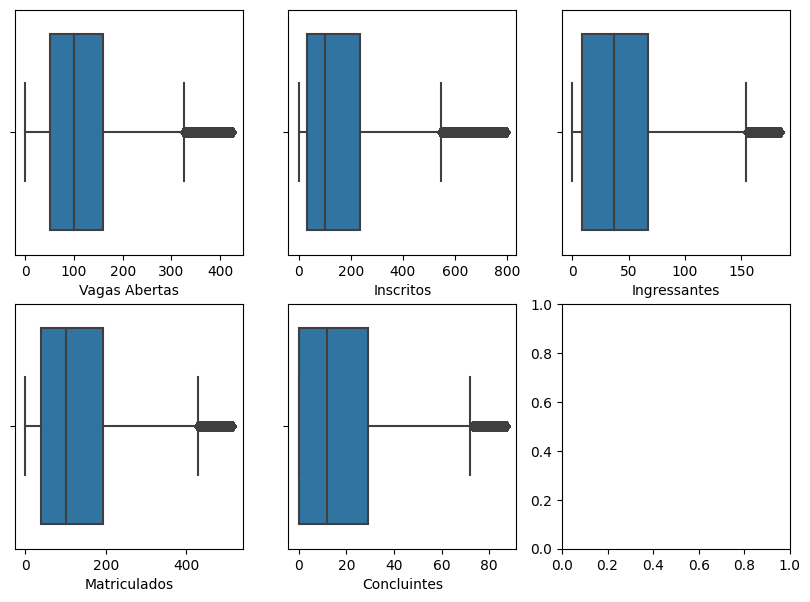

In [32]:
#Bossplot, de forma que os outliers não entrem no gráfico
fig, ax = plt.subplots(2, 3, figsize=(10, 7))
sns.boxplot(data=cursos[cursos['Vagas Abertas'] <= 425], x='Vagas Abertas', ax=ax[0, 0])
sns.boxplot(data=cursos[cursos['Inscritos'] <= 796], x='Inscritos', ax=ax[0, 1])
sns.boxplot(data=cursos[cursos['Ingressantes'] <= 184], x='Ingressantes', ax=ax[0, 2])
sns.boxplot(data=cursos[cursos['Matriculados'] <= 514], x='Matriculados', ax=ax[1, 0])
sns.boxplot(data=cursos[cursos['Concluintes'] <= 87], x='Concluintes', ax=ax[1, 1])
plt.show()
